In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split, KFold
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Data

df = pd.read_csv("data_processed.csv")

df.head(10)

,ID,Player,Win,Game,PA,AB,Run,H,2B,3B,...,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,aaronha01,Henry Aaron(1954~1976),1692,3234,13666,12121,2128,3703,614,96,...,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,aaronto01,Tommie Aaron(1962~1971),161,373,1045,944,99,216,42,6,...,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,abbotje01,Jeff Abbott(1997~2001),98,212,651,596,82,157,33,2,...,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,abbotku01,Kurt Abbott(1993~2001),308,665,2227,2044,268,523,109,23,...,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,abercre01,Reggie Abercrombie(2006~2008),63,140,421,386,56,86,20,2,...,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
5,abernbr01,Brent Abernathy(2001~2005),91,230,955,868,97,212,36,5,...,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
6,aberscl01,Cliff Aberson(1947~1949),24,63,205,179,25,45,7,3,...,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
7,abnersh01,Shawn Abner(1987~1992),157,323,902,840,81,191,39,4,...,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326
8,abramca01,Cal Abrams(1949~1956),194,546,1943,1612,255,433,64,19,...,0.009779,0.016469,0.156974,0.006176,0.003603,0.001544,-0.594,248,-0.002395,0.825599
9,abreubo01,Bobby Abreu(1996~2014),1226,2412,10081,8480,1453,2470,574,59,...,0.005853,0.028569,0.146414,0.039579,0.003273,0.008432,7.156,1598,0.004478,0.884320


In [3]:
print(df.columns)

Index(['ID', 'Player', 'Win', 'Game', 'PA', 'AB', 'Run', 'H', '2B', '3B', 'HR',
       'BB', 'SF', 'HBP', 'SB', 'Date_min', 'Date_max', '1B', 'XBH', 'AVG',
       'SLG', 'OBP', 'OPS', 'Hard_Hit_Efficiency', 'Speed_Score',
       'Runs_per_PA', '1B_per_PA', '2B_per_PA', '3B_per_PA', 'HR_per_PA',
       'BB_per_PA', 'SB_per_PA', 'HBP_per_PA', 'SF_per_PA', 'WPA_total',
       'High_Leverage_PA_total', 'WPA_per_High_Leverage_PA',
       'Hits_Rolling_Std'],
      dtype='object')


In [4]:
# Classify Columns

id = ["ID", "Player"]
y = ["Runs_per_PA"]
exclude = ["Run", "Win", "Game", "Date_min", "Date_max", "PA", "AB", "H", "1B", "2B", "3B", "HR", "BB", "SF", "SB"]

In [5]:
# Choose attributes

y_data = df.loc[:, y]
x_data = df.drop(columns=id + y + exclude)

x_data.head(10)

,HBP,XBH,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,2B_per_PA,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,32,1450,0.305503,0.555152,0.374276,0.929429,0.119627,0.069516,0.164862,0.044929,0.007025,0.054149,0.100395,0.017562,0.002342,0.008781,15.799,2219,0.007120,0.911988
1,0,61,0.228814,0.327331,0.290821,0.618152,0.064619,0.054545,0.148325,0.040191,0.005742,0.012440,0.081340,0.008612,0.000000,0.005742,-4.792,211,-0.022711,0.739198
2,3,53,0.263423,0.416107,0.307453,0.723561,0.088926,0.062980,0.159754,0.050691,0.003072,0.027650,0.058372,0.009217,0.004608,0.010753,0.294,84,0.003500,0.855905
3,17,194,0.255871,0.422701,0.305077,0.727778,0.094912,0.068253,0.147732,0.048945,0.010328,0.027840,0.059722,0.008981,0.007634,0.005388,-0.154,341,-0.000452,0.797247
4,7,31,0.222798,0.354922,0.274038,0.628961,0.080311,0.085511,0.130641,0.047506,0.004751,0.021378,0.049881,0.033254,0.016627,0.004751,-1.036,34,-0.030471,0.750012
5,7,49,0.244240,0.324885,0.297125,0.622009,0.056452,0.064921,0.170681,0.037696,0.005236,0.008377,0.062827,0.021990,0.007330,0.004188,-3.129,176,-0.017778,0.908542
6,0,15,0.251397,0.407821,0.346341,0.754163,0.083799,0.048780,0.146341,0.034146,0.014634,0.024390,0.126829,0.000000,0.000000,0.000000,0.255,20,0.012750,0.791516
7,7,54,0.227381,0.322619,0.268673,0.591292,0.064286,0.054324,0.151885,0.043237,0.004435,0.012195,0.047672,0.006652,0.007761,0.007761,-1.557,154,-0.010110,0.659326
8,7,115,0.268610,0.391439,0.386611,0.778051,0.071340,0.048893,0.163664,0.032939,0.009779,0.016469,0.156974,0.006176,0.003603,0.001544,-0.594,248,-0.002395,0.825599
9,33,921,0.291274,0.474764,0.394977,0.869741,0.108608,0.102371,0.153655,0.056939,0.005853,0.028569,0.146414,0.039579,0.003273,0.008432,7.156,1598,0.004478,0.884320


In [6]:
# Correlation Matrix

cor_matrix = x_data.corr()
n_attributes = len(x_data.columns)

cor_matrix.head(n_attributes)

,HBP,XBH,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,2B_per_PA,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
HBP,1.000000,0.715841,0.355543,0.464409,0.406571,0.482499,0.401423,0.239824,0.034507,0.274562,-0.035677,0.338873,0.152344,0.119150,0.398664,0.188571,-0.048185,0.683893,0.186760,0.398477
XBH,0.715841,1.000000,0.519011,0.640995,0.530348,0.654062,0.537674,0.308835,0.103787,0.358035,0.062775,0.435949,0.237450,0.113318,0.013212,0.186400,0.047731,0.948849,0.267722,0.539804
AVG,0.355543,0.519011,1.000000,0.680281,0.801099,0.786153,0.404372,0.462004,0.708805,0.466357,0.315998,0.095526,0.044426,0.149264,-0.028042,-0.068070,0.090187,0.509900,0.335759,0.737423
SLG,0.464409,0.640995,0.680281,1.000000,0.664393,0.957445,0.911738,0.377611,0.005192,0.602806,0.141726,0.764832,0.221869,-0.013247,0.144630,0.171773,0.142283,0.538899,0.333588,0.539893
OBP,0.406571,0.530348,0.801099,0.664393,1.000000,0.851826,0.459896,0.348897,0.369573,0.360154,0.222758,0.210912,0.617473,0.111793,0.089106,-0.059147,0.206469,0.503892,0.383603,0.551574
OPS,0.482499,0.654062,0.786153,0.957445,0.851826,1.000000,0.816614,0.399392,0.146356,0.561573,0.185355,0.617501,0.393951,0.033886,0.135778,0.097551,0.179455,0.572289,0.381940,0.591399
Hard_Hit_Efficiency,0.401423,0.537674,0.404372,0.911738,0.459896,0.816614,1.000000,0.392064,-0.337236,0.744147,0.070882,0.804292,0.230908,-0.081182,0.197754,0.222363,0.118375,0.410375,0.244927,0.345382
Speed_Score,0.239824,0.308835,0.462004,0.377611,0.348897,0.399392,0.392064,1.000000,0.184964,0.547423,0.427552,-0.013625,-0.032015,0.773115,0.054410,-0.039493,0.050705,0.284421,0.183588,0.429178
1B_per_PA,0.034507,0.103787,0.708805,0.005192,0.369573,0.146356,-0.337236,0.184964,1.000000,-0.057134,0.267688,-0.499777,-0.286236,0.204190,-0.196688,-0.236846,-0.033081,0.189228,0.130917,0.499965
2B_per_PA,0.274562,0.358035,0.466357,0.602806,0.360154,0.561573,0.744147,0.547423,-0.057134,1.000000,-0.000568,0.286370,-0.017740,-0.049121,0.121702,0.109066,0.006950,0.278174,0.150061,0.371527


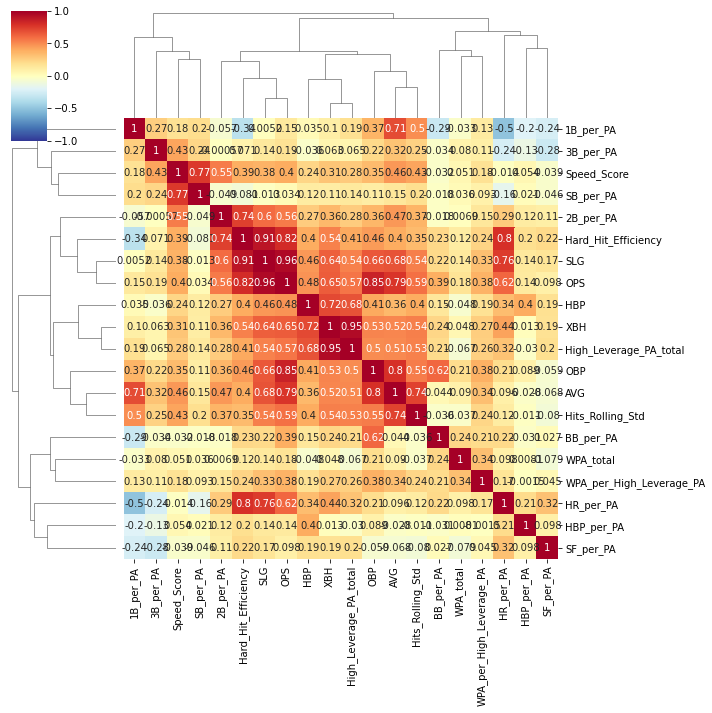

In [7]:
# Correaltion Plot

sns.clustermap(cor_matrix, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)


In [8]:
# Scaler

scaler = StandardScaler()
scaler.fit(x_data)
scaled_x_data = pd.DataFrame(scaler.transform(x_data), columns=x_data.columns)

scaled_x_data.head(10)

,HBP,XBH,AVG,SLG,OBP,OPS,Hard_Hit_Efficiency,Speed_Score,1B_per_PA,2B_per_PA,3B_per_PA,HR_per_PA,BB_per_PA,SB_per_PA,HBP_per_PA,SF_per_PA,WPA_total,High_Leverage_PA_total,WPA_per_High_Leverage_PA,Hits_Rolling_Std
0,0.760574,6.278287,1.787108,2.798714,1.621085,2.587567,2.149112,0.603485,0.194205,0.514348,0.139064,2.600777,0.670421,0.361770,-0.691372,0.895761,6.370363,4.546692,1.170251,1.231688
1,-0.665912,-0.496211,-0.649825,-0.624075,-0.654555,-0.690168,-0.304038,-0.184549,-0.395294,0.087312,-0.131376,-0.427270,0.001731,-0.273281,-1.054536,0.191382,-1.326995,-0.388030,-1.332711,-0.454981
2,-0.532179,-0.535229,0.449943,0.709707,-0.201032,0.419786,0.779978,0.259450,0.012130,1.033738,-0.694012,0.676941,-0.804257,-0.230410,-0.339819,1.352735,0.574261,-0.700137,0.866524,0.684248
3,0.091909,0.152463,0.209966,0.808763,-0.265830,0.464189,1.046918,0.537035,-0.416433,0.876315,0.835250,0.690762,-0.756888,-0.247149,0.129384,0.109523,0.406789,-0.068551,0.534963,0.111660
4,-0.353868,-0.642528,-0.840982,-0.209537,-1.112186,-0.576350,0.395771,1.445473,-1.025707,0.746624,-0.340256,0.221589,-1.102205,1.475300,1.524216,-0.038298,0.077079,-0.823013,-1.983790,-0.349418
5,-0.353868,-0.554738,-0.159635,-0.660819,-0.482676,-0.649548,-0.668254,0.361648,0.401643,-0.137585,-0.238031,-0.722259,-0.647906,0.675960,0.082275,-0.168571,-0.705330,-0.474044,-0.918848,1.198049
6,-0.665912,-0.720564,0.067791,0.585216,0.859362,0.742023,0.551322,-0.488019,-0.466017,-0.457571,1.742900,0.440300,1.598044,-0.884421,-1.054536,-1.139285,0.559682,-0.857419,1.642649,0.055720
7,-0.353868,-0.530351,-0.695349,-0.694860,-1.258481,-0.972997,-0.318885,-0.196221,-0.268408,0.361857,-0.406860,-0.445062,-1.179737,-0.412402,0.149072,0.659279,-0.117682,-0.528110,-0.275460,-1.234632
8,-0.353868,-0.232839,0.614788,0.339093,1.957434,0.993561,-0.004295,-0.482072,0.151524,-0.566419,0.719516,-0.134752,2.655869,-0.446170,-0.495784,-0.781450,0.242308,-0.297102,0.371889,0.388418
9,0.805152,3.698223,1.334949,1.590965,2.185553,1.959063,1.657728,2.332996,-0.205285,1.596873,-0.107988,0.743648,2.285310,1.924140,-0.546840,0.814828,3.139424,3.020565,0.948592,0.961614


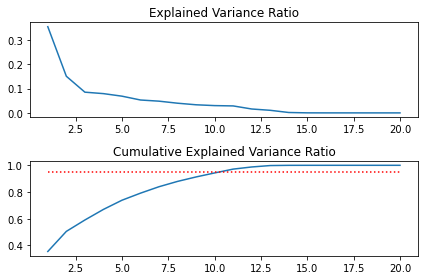

In [9]:
# PCA

threshold_PCA = 0.95

pca0 = PCA()
pca0.fit(scaled_x_data)
explained_variance_ratio_0 = pca0.explained_variance_ratio_

cumulative_explained_variance_ratio_0 = []
cur = 0
for i in range(n_attributes):
    cur += explained_variance_ratio_0[i]
    cumulative_explained_variance_ratio_0.append(cur)

plt.subplot(2, 1, 1)
plt.plot(range(1, n_attributes + 1), explained_variance_ratio_0)
plt.title("Explained Variance Ratio")
plt.subplot(2, 1, 2)
plt.plot(range(1, n_attributes + 1), cumulative_explained_variance_ratio_0)
plt.plot(range(1, n_attributes + 1), [threshold_PCA] * n_attributes, "r:")
plt.title("Cumulative Explained Variance Ratio")

plt.tight_layout()
plt.show()

In [10]:
# PCA limited

n_comp = 0
cur = 0
for i in range(n_attributes):
    cur += explained_variance_ratio_0[i]
    n_comp += 1
    if cur > threshold_PCA:
        break

pca1 = PCA(n_components=n_comp)
pca1.fit(scaled_x_data)
explained_variance_ratio_1 = pca1.explained_variance_ratio_

print(explained_variance_ratio_1)

x_pca = pd.DataFrame(pca1.transform(scaled_x_data), columns=["PC" + str(i) for i in range(n_comp)])

x_pca.head(10)

[0.35453483 0.15062724 0.08521986 0.07927648 0.06878763 0.05301533
 0.04822115 0.03983786 0.03336281 0.02998694 0.02866835]


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,8.619823,-1.286218,2.299682,-1.445418,2.202890,-1.824318,2.887094,-3.258189,-1.653891,-3.196547,-2.917957
1,-1.961444,-0.190630,-0.781118,-0.047412,-0.621698,-1.267429,-1.029474,0.636714,-0.040878,0.141456,-0.129981
2,0.885774,-0.718657,-0.012017,0.940027,-1.279598,-0.325178,1.966878,0.765341,0.168441,-0.144827,0.147216
3,1.317488,-0.508339,-0.168140,1.289825,-0.765265,-0.147629,0.557865,-0.902202,0.245430,0.346722,-0.180572
4,-1.199579,-0.605127,-2.155764,2.800281,0.350769,0.728913,-0.528428,0.195754,-0.447316,-1.237975,-0.405605
5,-1.240740,1.316090,-1.251333,0.186773,-0.239543,0.179677,-0.265242,0.484338,-0.161632,-0.510182,0.301714
6,0.601845,0.050579,3.335342,0.576405,-0.510701,-0.557292,-0.668306,-0.803021,0.845991,1.030883,0.777939
7,-2.239958,-0.660097,-0.999843,0.453256,-0.399818,-0.016621,0.882957,0.009118,-0.178137,0.443565,-0.613173
8,1.199309,0.486520,2.994723,-0.659242,0.212051,0.025402,-1.646841,0.847320,0.530473,0.219397,0.244810
9,6.862695,0.037603,1.264106,0.430657,2.964335,-1.622260,0.707955,0.247135,-1.719136,-1.026090,-1.667803


In [11]:
# Split data

x_train, x_test, y_train, y_test = train_test_split(x_pca, y_data, test_size=0.3, shuffle=True, random_state=195)


In [12]:
# KFold

n_s = 10
kf = KFold(n_splits=n_s, shuffle=True, random_state=195)


In [21]:
# Simple linear regresssion

model_lm = LinearRegression()
model_lm_best = LinearRegression()
r2_best = 0

for i, (train_idx, validation_idx) in enumerate(kf.split(x_train)):
    x_t, x_v = x_train.iloc[train_idx], x_train.iloc[validation_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[validation_idx]
    model_lm.fit(x_t, y_t)
    
    r2_train = r2_score(y_t, model_lm.predict(x_t))
    r2_validation = r2_score(y_v, model_lm.predict(x_v))
    print(f"R_squared for fold {i}: {r2_train:.4f}(train) / {r2_validation:.4f}(validation)")
    
    if r2_validation > r2_best:
        r2_best = r2_validation
        model_lm_best.fit(x_t, y_t)

r2_test = r2_score(y_test, model_lm_best.predict(x_test))
print("======================================")
print(f"R_squared of test data: {r2_test:.4f}")


R_squared for fold 0: 0.6480(train) / 0.6384(validation)
R_squared for fold 1: 0.6516(train) / 0.6016(validation)
R_squared for fold 2: 0.6453(train) / 0.6632(validation)
R_squared for fold 3: 0.6485(train) / 0.6346(validation)
R_squared for fold 4: 0.6519(train) / 0.5975(validation)
R_squared for fold 5: 0.6488(train) / 0.6297(validation)
R_squared for fold 6: 0.6406(train) / 0.6980(validation)
R_squared for fold 7: 0.6426(train) / 0.6886(validation)
R_squared for fold 8: 0.6537(train) / 0.5829(validation)
R_squared for fold 9: 0.6425(train) / 0.6876(validation)
R_squared of test data: 0.6259


In [26]:
# Random forest

model_rf = RandomForestRegressor(n_estimators=100)
model_rf_best = RandomForestRegressor(n_estimators=100)
r2_best = 0

for i, (train_idx, validation_idx) in enumerate(kf.split(x_train)):
    x_t, x_v = x_train.iloc[train_idx], x_train.iloc[validation_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[validation_idx]
    model_rf.fit(x_t, np.ravel(y_t))
    
    r2_train = r2_score(y_t, model_rf.predict(x_t))
    r2_validation = r2_score(y_v, model_rf.predict(x_v))
    print(f"R_squared for fold {i}: {r2_train:.4f}(train) / {r2_validation:.4f}(validation)")
    
    if r2_validation > r2_best:
        r2_best = r2_validation
        model_rf_best.fit(x_t, np.ravel(y_t))

r2_test = r2_score(y_test, model_rf_best.predict(x_test))
print("======================================")
print(f"R_squared of test data: {r2_test:.4f}")


R_squared for fold 0: 0.9474(train) / 0.6350(validation)
R_squared for fold 1: 0.9491(train) / 0.5950(validation)
R_squared for fold 2: 0.9477(train) / 0.6353(validation)
R_squared for fold 3: 0.9477(train) / 0.6372(validation)
R_squared for fold 4: 0.9476(train) / 0.5579(validation)
R_squared for fold 5: 0.9476(train) / 0.6206(validation)
R_squared for fold 6: 0.9464(train) / 0.6584(validation)
R_squared for fold 7: 0.9462(train) / 0.6634(validation)
R_squared for fold 8: 0.9478(train) / 0.5731(validation)
R_squared for fold 9: 0.9465(train) / 0.6513(validation)
R_squared of test data: 0.6007


In [15]:
# Expected Runs per PA

expected_lm = model_lm_best.predict(x_pca)
expected_rf = model_rf_best.predict(x_pca)
df["Expected_Runs_per_PA_lm"] = expected_lm
df["Expected_Runs_per_PA_rf"] = expected_rf

df.loc[:, ["Player", "Runs_per_PA", "Expected_Runs_per_PA_lm", "Expected_Runs_per_PA_rf"]].head(30)

,Player,Runs_per_PA,Expected_Runs_per_PA_lm,Expected_Runs_per_PA_rf
0,Henry Aaron(1954~1976),0.155715,0.159654,0.156197
1,Tommie Aaron(1962~1971),0.094737,0.092247,0.093079
2,Jeff Abbott(1997~2001),0.125960,0.108521,0.120171
3,Kurt Abbott(1993~2001),0.120341,0.114805,0.116710
4,Reggie Abercrombie(2006~2008),0.133017,0.110708,0.122300
5,Brent Abernathy(2001~2005),0.101571,0.102150,0.102698
6,Cliff Aberson(1947~1949),0.121951,0.117924,0.110817
7,Shawn Abner(1987~1992),0.089800,0.085422,0.088083
8,Cal Abrams(1949~1956),0.131240,0.121655,0.125744
9,Bobby Abreu(1996~2014),0.144133,0.155743,0.155686


In [16]:
df.to_csv(path_or_buf="Result.csv", index=False)

In [18]:
print(f"R_squared_Linear: {r2_score(y_data, expected_lm):.4f}")
print(f"R_squared_RF: {r2_score(y_data, expected_rf):.4f}")

R_squared_Linear: 0.6406
R_squared_RF: 0.8211
